> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

 it's adataset that include about10000 movies infromation that describe id, cast, homepage, popularity, director, original_title,	tagline, release year, genres, vote average, vote count, production_companies, overview, runtime,budget adj, revenue adj, rates and revenue in 21 columns. 
 


### Question(s) for Analysis
>**Question**:

What is the least earned revenu movie?

What is the most earned revenu movie?

What are the top 5 movies based on their revenue?

What is the average Revenue earned by the movies?

What is the lowest budget movie?

What is the largest budget movie?

What are the top 5 movies based on their budget?

What is the average Budget of the movies?

What is the profit for each movie?

What is the biggest profit movie?

What is the lowest profit movie?

What is the average runtime of all the movies?

What is the relation of runtime of all the movies?

What are the top 5 movies based on their profit?

What is the longest movie?

What is the shortest movie?

Who actors the most appearances  in movies?

Who director is the most movies directortion ?

What are the Most 5 Frequent Cast?

What are the top 5 movies based on their popularity?

What is the correlation between budget & revenue?

What is the correlation between popularity & runtime?
 
What is the visualizations of revenue?

What is the visualizations of budget?


> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
import operator
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0


Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv') 
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

remove any NAN cast, NAN geners.

zero revenue and zero budget movie 

remove any duplicated rows

replace zero with NAN runtime values .

 

In [4]:
#type of columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#shape of dataframe
df.shape

(10866, 21)

In [6]:
# remove any duplicated rows
rows, columns = df.shape
df.drop_duplicates(keep ='first', inplace=True)
df.shape

(10865, 21)

In [7]:

# remove any revenue and zero budget movie.
L = ['budget', 'revenue']
df[L] = df[L].replace(0, np.NAN)
df.dropna(subset = L)
df.shape

(10865, 21)

In [8]:
# remove any NAN cast, director and geners.
df = df[df["genres"].isnull() == False]
df = df[df["cast"].isnull() == False]
df = df[df["director"].isnull() == False]
df.shape

(10731, 21)

In [9]:
# replace zero with NAN runtime values .
df['runtime'] =df['runtime'].replace(0, np.NAN)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.

### Research Question 1 (What is the least earned revenu movie?)


In [10]:
#average function to call
def avgerage(col):
    avg = df[col].mean()
    return avg

In [11]:
#find min value
lowest_revenu = df['revenue'].idxmin()
#extract all row data that has min value
lowest_revenu_movie = pd.DataFrame(df.loc[lowest_revenu])
print(lowest_revenu_movie)

                                                                   5067
id                                                                13537
imdb_id                                                       tt0323944
popularity                                                     0.462609
budget                                                            6e+06
revenue                                                               2
original_title                                          Shattered Glass
cast                  Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
homepage                                                            NaN
director                                                      Billy Ray
tagline                                                             NaN
keywords                                                            NaN
overview              Fact-based 2003 drama about the young journali...
runtime                                                         


### Research Question 2 (What is the most earned revenu movie?)


In [12]:
#find max value
most_revenu = df['revenue'].idxmax()
#extract all row data that has man value
most_revenu_movie = pd.DataFrame(df.loc[most_revenu])
print(most_revenu_movie)

                                                                   1386
id                                                                19995
imdb_id                                                       tt0499549
popularity                                                      9.43277
budget                                                         2.37e+08
revenue                                                     2.78151e+09
original_title                                                   Avatar
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
homepage                                    http://www.avatarmovie.com/
director                                                  James Cameron
tagline                                     Enter the World of Pandora.
keywords              culture clash|future|space war|space colony|so...
overview              In the 22nd century, a paraplegic Marine is di...
runtime                                                         


### Research Question 3 (What are the top 5 movies based on their revenue?)


In [13]:
# use moive name & revenu only 
movies_revenues = df[["original_title", "revenue"]]
# Sort moive name by revenu diascending 
sorted_movies_revenues = movies_revenues.sort_values(by="revenue", ascending=False)
sorted_movies_revenues.head()

,original_title,revenue
1386,Avatar,2.781506e+09
3,Star Wars: The Force Awakens,2.068178e+09
5231,Titanic,1.845034e+09
4361,The Avengers,1.519558e+09
0,Jurassic World,1.513529e+09



### Research Question 4 (What are the top 5 movies based on their revenue graphicaly?)


[Text(0.5,1,'the top 5 movies based on their revenue')]

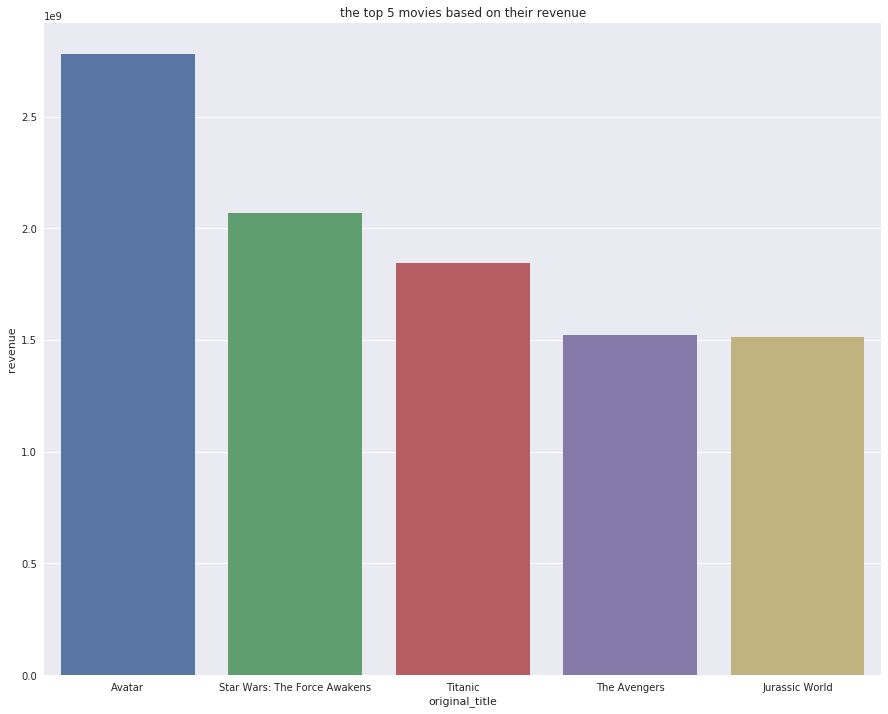

In [14]:
# graph seaborn config
sbn.set(rc={'figure.figsize':(15,12)}, font_scale=1)
#axises x,y data
axis = sbn.barplot(sorted_movies_revenues.head().original_title, sorted_movies_revenues.head().revenue)
axis.set(title = 'the top 5 movies based on their revenue')


### Research Question 5 (What is the average Revenue earned by the movies ?)


In [15]:
#call func
avgerage('revenue')

89339812.8653727


### Research Question 6 (What is the lowest budget movie?)


In [16]:
#find min value
lowest_budget = df['budget'].idxmin()
#extract all row data that has min value
lowest_budget_movie = pd.DataFrame(df.loc[lowest_budget])
print(lowest_budget_movie)

                                                                   1151
id                                                               287524
imdb_id                                                       tt2165765
popularity                                                     0.177102
budget                                                                1
revenue                                                             NaN
original_title                                              Fear Clinic
cast                  Thomas Dekker|Robert Englund|Cleopatra Coleman...
homepage                                http://www.fearclinicmovie.com/
director                                                    Robert Hall
tagline                                                             NaN
keywords                                             phobia|doctor|fear
overview              A doctor works to cure patients suffering from...
runtime                                                         


### Research Question 7 (What is the largest budget movie?)


In [17]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#find max value
most_budget = df['budget'].idxmax()
#extract all row data that has man value
most_budget_movie = pd.DataFrame(df.loc[most_budget])
print(most_budget_movie)

                                                                   2244
id                                                                46528
imdb_id                                                       tt1032751
popularity                                                      0.25054
budget                                                         4.25e+08
revenue                                                     1.10876e+07
original_title                                        The Warrior's Way
cast                  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage                         http://www.iamrogue.com/thewarriorsway
director                                                     Sngmoo Lee
tagline                                         Assassin. Hero. Legend.
keywords              assassin|small town|revenge|deception|super speed
overview              An Asian assassin (Dong-gun Jang) is forced to...
runtime                                                         

### Research Question 8  (What are the top 5 movies based on their budget?)

In [18]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# use moive name & budgets only 
movies_budgets = df[["original_title", "budget"]]
# Sort moive name by budgets diascending 
sorted_movies_budgets = movies_budgets.sort_values(by="budget", ascending=False)
sorted_movies_budgets.head()

,original_title,budget
2244,The Warrior's Way,425000000.0
3375,Pirates of the Caribbean: On Stranger Tides,380000000.0
7387,Pirates of the Caribbean: At World's End,300000000.0
14,Avengers: Age of Ultron,280000000.0
6570,Superman Returns,270000000.0


### Research Question 9  (What are the top 5 movies based on their budgets graphicaly?)

[Text(0.5,1,'the top 5 movies based on their budgets')]

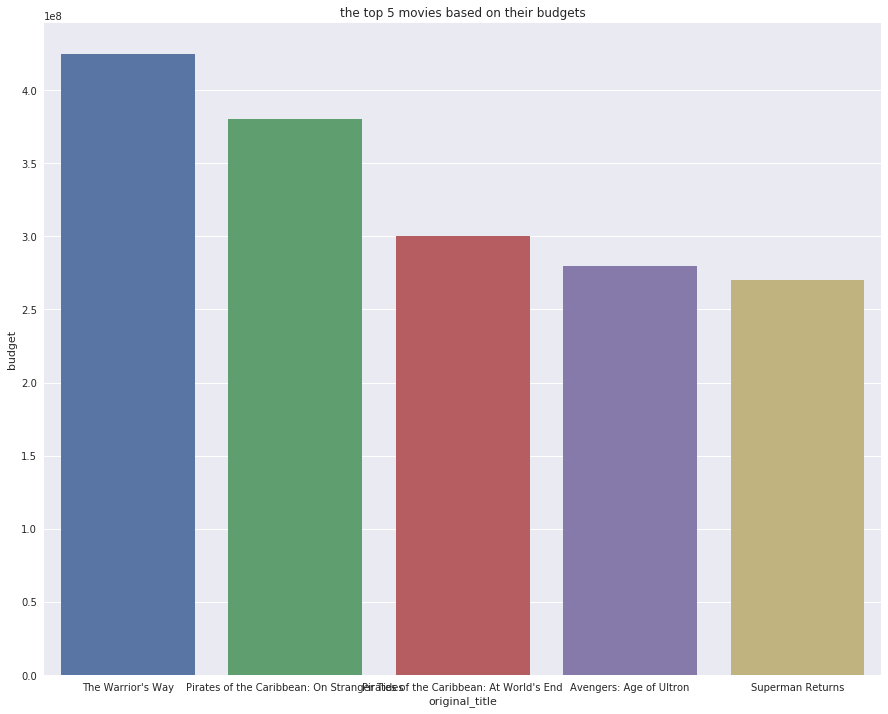

In [19]:
# graph seaborn config
sbn.set(rc={'figure.figsize':(15,12)}, font_scale=1)
#axises x,y data
axis = sbn.barplot(sorted_movies_budgets.head().original_title, sorted_movies_budgets.head().budget)
axis.set(title = 'the top 5 movies based on their budgets')

### Research Question 10 (What is the profit for each movie?)

In [20]:
#add new coulmn to data set include movie profit
df['profit'] = df['revenue'] - df['budget']
df.insert(5,'profit' ,df['profit'])
df.head()


ValueError: cannot insert profit, already exists

### Research Question 11  (What is the lowest profit movie?)

In [21]:
#find min value
lowest_profit = df['profit'].idxmin()
#extract all row data that has min value
lowest_profit_movie = pd.DataFrame(df.loc[lowest_profit])
print(lowest_profit_movie)

                                                                   2244
id                                                                46528
imdb_id                                                       tt1032751
popularity                                                      0.25054
budget                                                         4.25e+08
revenue                                                     1.10876e+07
original_title                                        The Warrior's Way
cast                  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage                         http://www.iamrogue.com/thewarriorsway
director                                                     Sngmoo Lee
tagline                                         Assassin. Hero. Legend.
keywords              assassin|small town|revenge|deception|super speed
overview              An Asian assassin (Dong-gun Jang) is forced to...
runtime                                                         

### Research Question 12  (What is the biggest profit movie?)

In [22]:
#find max value
most_profit = df['profit'].idxmax()
#extract all row data that has man value
most_profit_movie = pd.DataFrame(df.loc[most_profit])
print(most_profit_movie)

                                                                   1386
id                                                                19995
imdb_id                                                       tt0499549
popularity                                                      9.43277
budget                                                         2.37e+08
revenue                                                     2.78151e+09
original_title                                                   Avatar
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
homepage                                    http://www.avatarmovie.com/
director                                                  James Cameron
tagline                                     Enter the World of Pandora.
keywords              culture clash|future|space war|space colony|so...
overview              In the 22nd century, a paraplegic Marine is di...
runtime                                                         

### Research Question 13  (What are the top 5 movies based on their profit?)

In [23]:
# use moive name & profit only 
movies_profit = df[["original_title", "profit"]]
# Sort moive name by budgets diascending 
sorted_movies_profit = movies_profit.sort_values(by="profit", ascending=False)
sorted_movies_profit.head()

,original_title,profit
1386,Avatar,2.544506e+09
3,Star Wars: The Force Awakens,1.868178e+09
5231,Titanic,1.645034e+09
0,Jurassic World,1.363529e+09
4,Furious 7,1.316249e+09



### Research Question 14  (What is the longest movie?)

In [24]:
#find max value
most_runtime = df['runtime'].idxmax()
#extract all row data that has man value
most_runtime_movie = pd.DataFrame(df.loc[most_runtime])
print(most_runtime_movie)

                                                                   3894
id                                                               125336
imdb_id                                                       tt2044056
popularity                                                     0.006925
budget                                                              NaN
revenue                                                             NaN
original_title                            The Story of Film: An Odyssey
cast                  Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
homepage              http://www.channel4.com/programmes/the-story-o...
director                                                   Mark Cousins
tagline                                                             NaN
keywords              cinema|nouvelle vague|hindi cinema|cinema novo...
overview              The Story of Film: An Odyssey, written and dir...
runtime                                                         

### Research Question 15  (What is the shortest movie?)

In [25]:
#find max value
short_runtime = df['runtime'].idxmin()
#extract all row data that has man value
short_runtime_movie = pd.DataFrame(df.loc[short_runtime])
print(short_runtime_movie)

                                                                   1112
id                                                               264170
imdb_id                                                       tt3643208
popularity                                                     0.202776
budget                                                              NaN
revenue                                                             NaN
original_title                                     Batman: Strange Days
cast                              Kevin Conroy|Brian George|Tara Strong
homepage                                                            NaN
director                                                     Bruce Timm
tagline                                                             NaN
keywords              dc comics|superhero|based on comic book|noir|p...
overview              Celebrating Batmanâ€™s 75th anniversary, DC En...
runtime                                                         

### Research Question 16  (What is the relation of runtime of all the movies?)

ValueError: max must be larger than min in range parameter.

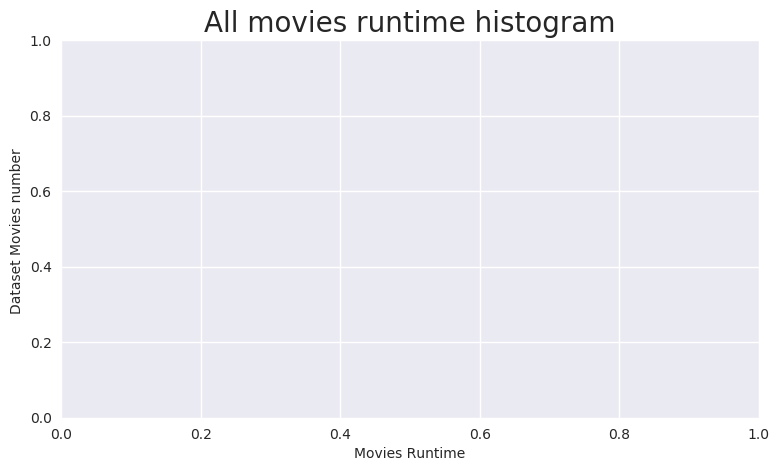

In [26]:
#histogram size
plt.figure(figsize=(9,5), dpi = 100)
#X name 
plt.xlabel('Movies Runtime', fontsize = 10)
#Y name  
plt.ylabel('Dataset Movies number ', fontsize=10)
#title
plt.title('All movies runtime histogram', fontsize=20)
#plt.hist( df, range( 0, 100))
plt.hist(df['runtime'], rwidth = 0.8, bins =40)
plt.show()

### Research Question 17 (What is the average runtime of all the movies?


In [27]:
#average run time
avgerage('runtime')

102.73689619732785

### Research Question 18  (Who actor is the most appearances in movies?)

In [28]:
#describe cast as string
Cast_actors = df["cast"].str 
#split cast to acts
splitted_acts = Cast_actors.split("|")
#create dictrotry that include all strings
Cast_actors_dict = {}
#check every actor name in splitted actors
for Cast_actors_List in splitted_acts:
    for act in Cast_actors_List:
        if act in Cast_actors_dict:
            Cast_actors_dict[act] += 1
        else:
            Cast_actors_dict[act] = 1

sorted_Cast_actors_dict = sorted(Cast_actors_dict.items(), key = operator.itemgetter(1), reverse = True)
key, value = sorted_Cast_actors_dict[0]
print (key)

Robert De Niro


### Research Question 19 (Who director is the most movies directortion ?)

In [29]:
#describe director as string
df["director"] = df["director"].apply(lambda x: str(x))
directors = df["director"].str 
splitted_directors = directors.split("|")
#create dictrotry that include all strings
director_dict = {}
#check every actor name in splitted actors
for director_List in splitted_directors:
    for director in director_List:
        if director in director_dict:
            director_dict[director] += 1
        else:
            director_dict[director] = 1

sorted_director_dict = sorted(director_dict.items(), key = operator.itemgetter(1), reverse = False)
key, value = sorted_director_dict[-1]
print (key)

Woody Allen


### Research Question 20  (What are the Most 5 Frequent Cast?)

In [30]:
sorted_Cast_actors_dict[0:5]

[('Robert De Niro', 72),
 ('Samuel L. Jackson', 71),
 ('Bruce Willis', 62),
 ('Nicolas Cage', 61),
 ('Michael Caine', 53)]

### Research Question 21  (What are the top 5 movies based on their popularity?)

In [31]:

# use moive name & popularity only 
movies_popularity = df[["original_title", "popularity"]]
# Sort moive name by budgets diascending 
sorted_movies_popularity = movies_popularity.sort_values(by="popularity", ascending=False)
sorted_movies_popularity.head()

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507


### Research Question 22  (What is the correlation between revenue & budget?)

Text(0.5,0.98,'scatterplot budget and revenue')

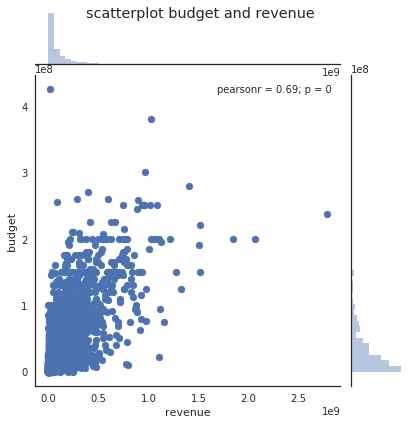

In [32]:
# scatter plot config 
sbn.set(rc={'figure.figsize':(20,20)}, font_scale=1.0, style="white")
cor_fig = sbn.jointplot(x = "revenue", y = "budget", kind = "scatter", data = df[['revenue', 'budget']])
#title
cor_fig.fig.suptitle('scatterplot budget and revenue')

### Research Question 23  (What is the correlation between popularity & runtime?)

Text(0.5,0.98,'scatterplot popularity and runtime')

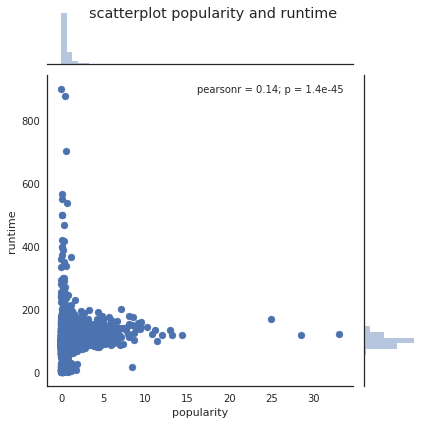

In [33]:
# scatter plot config 
sbn.set(rc={'figure.figsize':(20,20)}, font_scale=1.0, style="white")
cor_fig = sbn.jointplot(x = "popularity", y = "runtime", kind = "scatter", data = df[['popularity', 'runtime']])
#title
cor_fig.fig.suptitle('scatterplot popularity and runtime')

In [34]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,10731.000000,10731.000000,5.153000e+03,4.843000e+03,10703.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04,3.849000e+03
mean,65201.741869,0.652615,3.082824e+07,8.933981e+07,102.736896,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07,7.056595e+07
std,91470.508056,1.004804,3.893199e+07,1.621546e+08,30.079331,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08,1.506990e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10547.500000,0.210765,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,-1.312284e+06
50%,20323.000000,0.387081,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,2.014450e+07
75%,73948.500000,0.720889,4.000000e+07,1.000000e+08,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07,8.198066e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


### Research Question 24  (What is the visualizations of budget?)

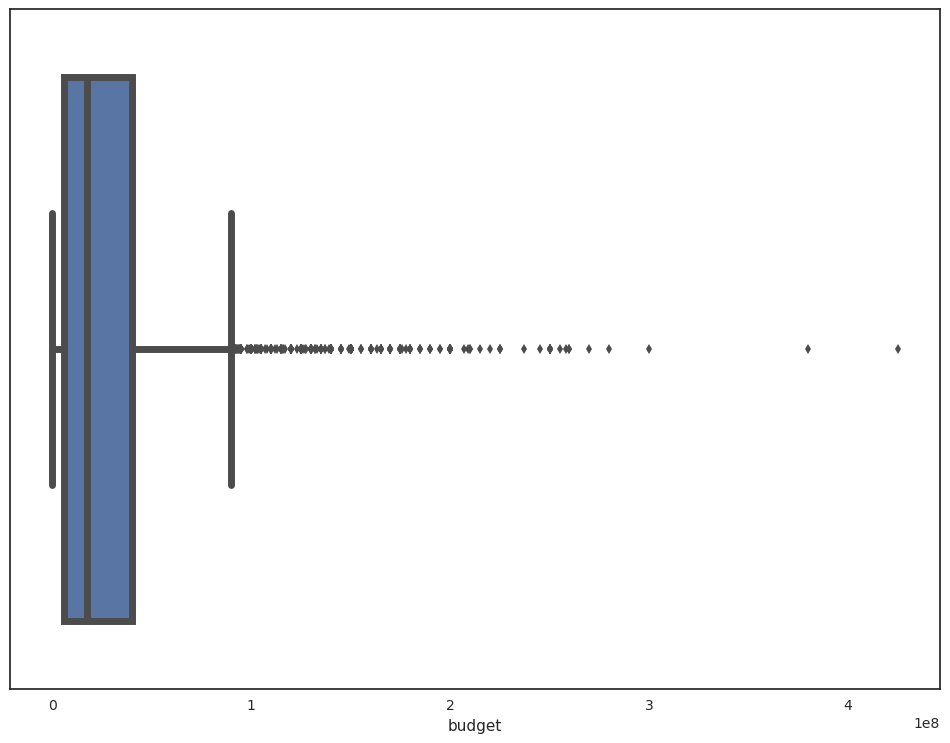

In [35]:
# 1d element that need to visulize
element= df['budget']
#figure config
plt.figure(figsize=(12,9), dpi = 100)
sbn.boxplot(element , linewidth = 5)
plt.show()

### Research Question 25  (What is the visualizations of revenue?)

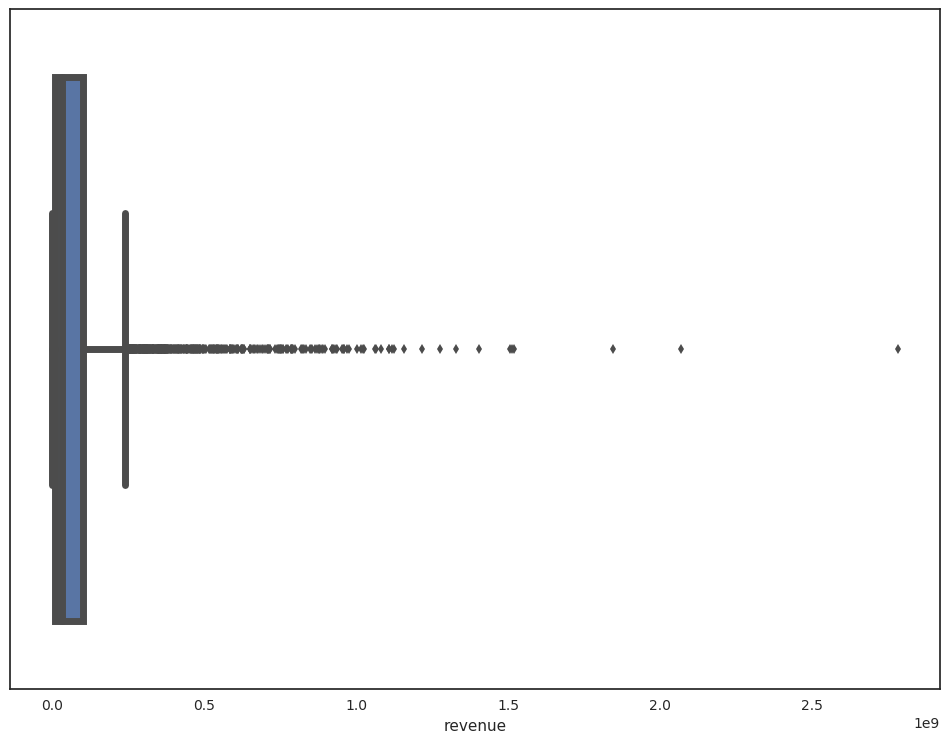

In [36]:
# 1d element that need to visulize
element= df['revenue']
#figure config
plt.figure(figsize=(12,9), dpi = 100)
sbn.boxplot(element , linewidth = 5)
plt.show()

<a id='conclusions'></a>
## Conclusions
Finally, I anayzie some data to show the most earned revenu movie is Avatar with about 2.782 billion dollars, the least earned revenu movie is Shattered Glass with about 2 dollars and the top 5 movies based on revenues descending method are Avatar, Star Wars: The Force Awakens, Titanic, The Avengers and Jurassic World.
Then, i turned to analyize based on budget such the largest budget movie is The Warrior's Way with about 425 millon dollars, the lowest budget movie is Fear Clinic Roadwith about 1 dollar and the top 5 movies based on budget in descending method are  The Warrior's Way, Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean: At World's End, Avengers: Age of Ultron and Superman Returns.
Then profit case, i start by the most losses is The Warrior's Way movie with about 414 million dollars, the largest profit is Avatar with about 2.54 billon dollars and the top 5 movies based on their profit are Avatar with about 2.54 billon dollars, Star Wars: The Force Awakens with about 1.85 billon dollars, Titanic with about 1.65 billon dollars, Jurassic World with about 1.63 billon dollars and Furious 7 with about 1.31 billon dollars.
The longest movie is The Story of Film: An Odyssey in 900 minutes and shortest movie is Batman: Strange Days in 3 minutes, most of movies reaches about 6000 movies between 130 to 150 minutes as explained in 'All movies runtime histogram', The average runtime movies is about 102.7 minutes.
The most 5 popularity movies are Jurassic World with about 33% of popularity, Mad Max: Fury Road with about 28.4% of popularity, Interstellar with about 25% of popularity, Guardians of the Galaxy with about 14.3% of popularity and Insurgent with about 13.1% of popularity.
The most actor appearances in movies is Robert De Niro and The most director to movies is Woody Allen.
The most 5 actor appeared in movies are Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage and Michael Caine.
the correlation between revenue & budget as scatter plot explained as a positive corellation relationship measure the quailty of movie, then i deducted that is no corrletion between movie runtime and popularity but most of popularity to the about 120 to 150 minutes movies.

Challenges and limititions:

My analysis presented operations are always dependent on the data provided to them, and they always contribute, after a good analysis, to the study of the success factors of the movie , as outlined from the given data. We encountered some problems, and we overcame what hinders us in the work presented by us, such as the NAN values and some types of data that are inconsistent with the nature of the operations. Which will be based on data such as the director column and other data in an incorrect format, such as release year, and Null values for the duration movie run time, geners, as well as the budget and revenues, and this necessitated converting them to 0 to ensure good results.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0